# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Opens the Chrome Browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all('tr', {'class':'data-row'})
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#Creating empty list
data_list = []

# Loop through each row
for index in range(len(rows)):
    # Extract the current row
    row = rows[index]

    # Extract the table data (td) elements for the current row
    td_elements = row.find_all('td')

    # Check if there are enough elements in td_elements
    if len(td_elements) >= 7:
        
        #Create a dictionary for each column
        data_dict = {
            'id': td_elements[0].text,
            'terrestrial_date': td_elements[1].text,
            'sol': td_elements[2].text,
            'ls': td_elements[3].text,
            'month': td_elements[4].text,
            'min_temp': td_elements[5].text,
            'pressure': td_elements[6].text,
        }

        # Append the dictionary to the list
        data_list.append(data_dict)
    

# Print the list of dictionaries
print(data_list)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Import Pandas
import pandas as pd

# Convert the articles list to a Pandas DataFrame
df = pd.DataFrame(data_list)


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64[ns]')
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')


In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
#Creating list to loop through for months
number_months = []

# Loop through each month (from 1 to 12)
for month_num in range(1, 13):
    # Filter DataFrame for the current month
    current_month = df[df['month'] == month_num]
    
    # Calculate the count for the current month
    N_M = current_month['month'].count()  # Using count on the 'month' column
    
    # Append the count to the list
    number_months.append(N_M)

# Create a DataFrame from the list of counts
NM = pd.DataFrame(number_months, columns=['Months on Mars'])

# Rename the index to 'Month'
NM.index = range(1, 13)  



In [13]:
# 1. How many months are there on Mars?
# Print the DataFrame 
print(NM)

    Months on Mars
1              174
2              178
3              192
4              194
5              149
6              147
7              142
8              141
9              134
10             112
11             138
12             166


In [14]:
# 2. How many Martian days' worth of data are there?
df['terrestrial_date'].count()

1867

In [15]:
#importing numpy and statistics
import numpy as np
from statistics import mean

#importing list for temperature months
monthtemp = []

# Loop through each month (from 1 to 12)
for month_num in range(1, 13):
    # Filter DataFrame for the current month
    current_month = df.query(f'month == {month_num}')
    
    # Calculate the average temperature for the current month
    avg_temp = round(mean(current_month['min_temp']), 6)
    
    # Append the average temperature to the list
    monthtemp.append(avg_temp)

# Create a DataFrame from the list of average temperatures
mt = pd.DataFrame(monthtemp, columns=['Min Average Temperature'])

# Rename the index to 'Month'
mt.index = range(1, 13) 
mt.index.name = 'Month'



In [16]:
# 3. What is the average low temperature by month?
# Print the DataFrame 
print(mt)

       Min Average Temperature
Month                         
1                   -77.160920
2                   -79.932584
3                   -83.307292
4                   -82.747423
5                   -79.308725
6                   -75.299320
7                   -72.281690
8                   -68.382979
9                   -69.171642
10                  -71.982143
11                  -71.985507
12                  -74.451807


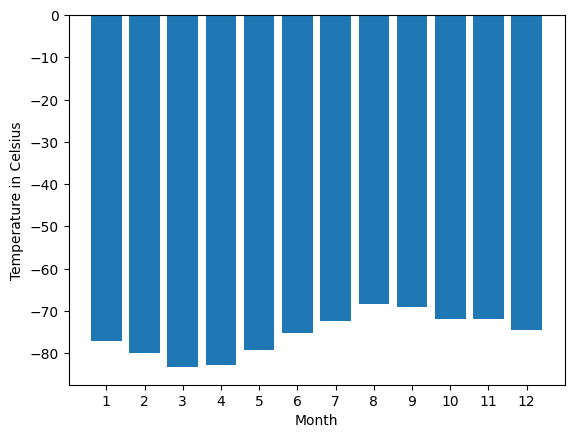

In [17]:
# importing matplotlib
import matplotlib.pyplot as plt

#creating month column for dataframe
mt['Month'] = mt.index

#plotting the average temperature by month
plt.bar(mt['Month'],mt['Min Average Temperature'])
plt.ylabel('Temperature in Celsius')
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

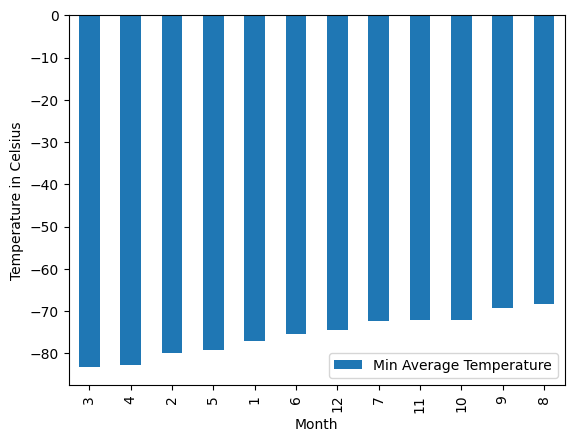

In [18]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the DataFrame based on 'Min Average Temperature'
mt2 = mt.sort_values(by=['Min Average Temperature'])

#Making sure the months do not get reordered chronologically
# Set x-axis labels based on the sorted order of 'Min Average Temperature'
mt2['Month'] = pd.Categorical(mt2['Month'], categories=mt2['Month'].unique(), ordered=False)

# Plot the bar chart
mt2.plot(x = 'Month',y = 'Min Average Temperature', kind='bar')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Month')
plt.show()


In [19]:
# 4. Average pressure by Martian month

#Creating list to loop through
monthpres = []

# Loop through each month (from 1 to 12)
for month_num in range(1, 13):
    # Filter DataFrame for the current month
    current_month = df.query(f'month == {month_num}')
    
    # Calculate the average temperature for the current month
    avg_pres = round(mean(current_month['pressure']), 3)
    
    # Append the average temperature to the list
    monthpres.append(avg_pres)

# Create a DataFrame from the list of average temperatures
mp = pd.DataFrame(monthpres, columns=['Average Pressure'])

# Rename the index to 'Month'
mp.index = range(1, 13)  # Assuming you want the index to be 1-12
mp.index.name = 'Month'

# Print the DataFrame vertically
print(mp)

       Average Pressure
Month                  
1               862.489
2               889.455
3               877.323
4               806.330
5               748.557
6               745.054
7               795.106
8               873.830
9               913.306
10              887.312
11              857.014
12              842.157


<Figure size 640x480 with 0 Axes>

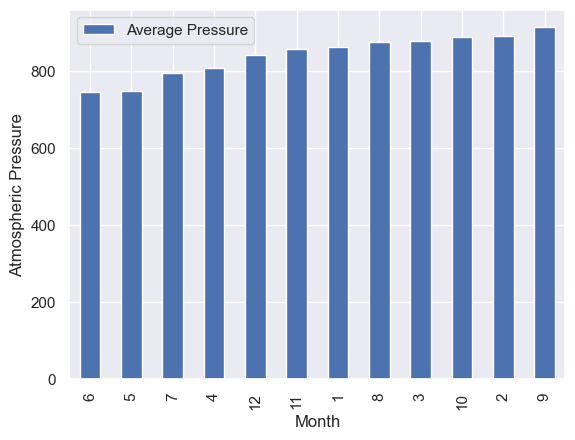

In [20]:
# Plot the average pressure by month

#Import seaborn
import seaborn as sns

#Set up plot
mp['Month'] = mp.index
mp['Month'] = pd.Categorical(mp['Month'], categories=mp['Month'].unique(), ordered=False)
sns.set()
plt.figure()

#Plot the dataframe from the list which included average pressure for each month

mp = mp.sort_values(by=['Average Pressure'])
mp.plot(x = 'Month',y = 'Average Pressure', kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [21]:
df['days'] = df.index

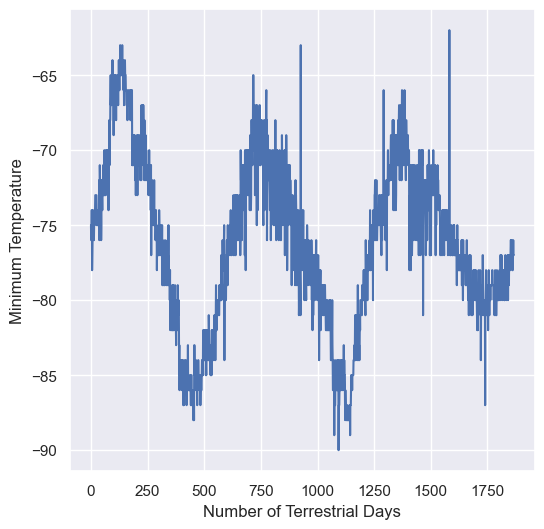

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#Set up plot
df['days'] = df.index
plt.figure(figsize=(6,6))

#plot
plt.plot(df["days"], df["min_temp"])  
plt.ylabel('Minimum Temperature')  
plt.xlabel('Number of Terrestrial Days')  
plt.yticks([-65, -70, -75, -80, -85, -90])
plt.xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv('out.csv',index=False)

In [24]:
browser.quit()